开始计算，目标迭代次数: 10000000 ...
计算完成，正在绘图...


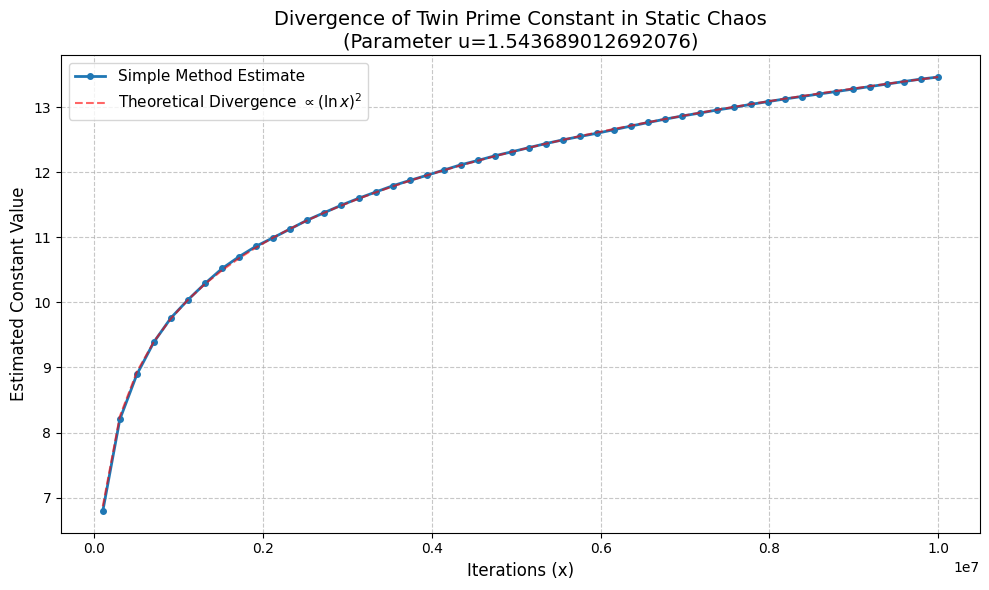

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_divergence(max_iter=10000000):
    print(f"开始计算，目标迭代次数: {max_iter} ...")
    
    # [cite_start]1. 混沌系统参数设置 [cite: 176]
    # 使用带融合临界点 u ≈ 1.5437
    u = 1.543689012692076
    x = 0.1
    
    # 预热系统，消除初始瞬态
    for _ in range(10000):
        x = 1 - u * x**2

    # 2. 数据容器
    lrl_count = 0
    history = [0, 0, 0] # 用于检测 L-R-L 模式
    
    # 设置采样点：从 10万 到 1000万，取 50 个点以便画出平滑曲线
    checkpoints = np.linspace(100000, max_iter, 50).astype(int)
    checkpoints = np.unique(checkpoints) # 去重
    
    x_vals = []       # 迭代次数 (x轴)
    c_estimates = []  # 估算的 C 值 (y轴)
    
    current_iter = 0
    
    # 3. 循环计算
    for target in checkpoints:
        steps_to_run = target - current_iter
        
        # 执行迭代
        for _ in range(steps_to_run):
            x = 1 - u * x**2
            
            # [cite_start]定义符号区域: L (x<0), R (x>0) [cite: 57, 58]
            is_L = 1 if x < 0 else 0
            
            # 更新滑动窗口
            history.pop(0)
            history.append(is_L)
            
            # [cite_start]检测 L-R-L (素数-合数-素数) 模式 [cite: 221]
            if history == [1, 0, 1]:
                lrl_count += 1
        
        current_iter = target
        
        # === 简单法反推公式 ===
        # C ≈ Count * (ln x)^2 / (2x)
        # 如果系统密度不衰减，这个值将随 x 发散
        c_est = lrl_count * (np.log(target)**2) / (2 * target)
        
        x_vals.append(target)
        c_estimates.append(c_est)

    print("计算完成，正在绘图...")

    # 4. 绘制趋势图
    plt.figure(figsize=(10, 6), dpi=100)
    
    # 绘制实验数据曲线
    plt.plot(x_vals, c_estimates, 'o-', color='#1f77b4', markersize=4, label='Simple Method Estimate', linewidth=2)
    
    # 添加一个理论辅助线 (示意)
    # 理论上，因为 L-R-L 线性增长，C_est 应该正比于 (ln x)^2
    # 我们用最后一个点来拟合一个系数 k，画出理论发散曲线
    k = c_estimates[-1] / (np.log(x_vals[-1])**2)
    theoretical_curve = [k * (np.log(val)**2) for val in x_vals]
    plt.plot(x_vals, theoretical_curve, '--', color='red', alpha=0.6, label=r'Theoretical Divergence $\propto (\ln x)^2$')

    # 图表装饰
    plt.title(f'Divergence of Twin Prime Constant in Static Chaos\n(Parameter u={u})', fontsize=14)
    plt.xlabel('Iterations (x)', fontsize=12)
    plt.ylabel('Estimated Constant Value', fontsize=12)
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend(fontsize=11)
    
    # 使用科学计数法显示 x 轴
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()

# 运行函数
visualize_divergence()